In [51]:
import investpy as ip
from datetime import datetime
from datetime import timedelta
from pycaret.regression import *
import matplotlib.pyplot as plt

In [52]:
tkr = 'Fundo de Invest Ishares SP 500'
today = (datetime.today() - timedelta(days=1)).strftime('%d/%m/%Y')
today

'25/05/2021'

In [53]:
data = ip.get_etf_historical_data(tkr, 'brazil','01/01/2000',today)
data.drop(columns=['Exchange'], inplace=True)

In [54]:
data.tail(3)

,Open,High,Low,Close,Volume,Currency
Date,,,,,,
2021-05-21,239.00,242.67,238.61,242.00,652234,BRL
2021-05-24,241.96,243.47,241.37,242.50,243523,BRL
2021-05-25,242.44,243.09,240.89,242.43,264492,BRL


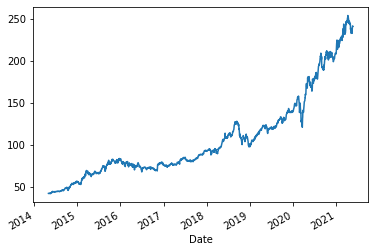

In [55]:
data.Low.plot();

In [56]:
y = data.Close
x = np.array(data.reset_index().index)

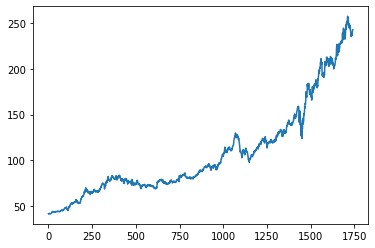

In [57]:
plt.plot(x,y);

In [58]:
from sklearn.isotonic import IsotonicRegression
model = IsotonicRegression()
yhat = model.fit_transform(x,y)

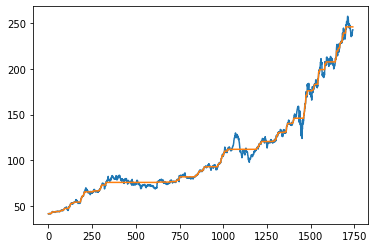

In [59]:
plt.plot(x,y)
plt.plot(x,yhat);

In [60]:
yhat[-1]

245.62926829268292

In [61]:
model.score(x,y)

0.9947082156292529

In [101]:
e = y - yhat
ze = e/np.std(e)

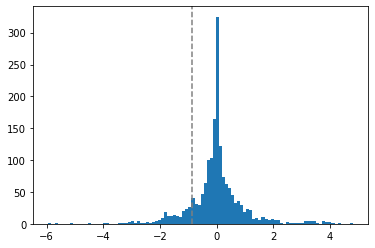

In [102]:
plt.hist(ze, bins=100)
plt.axvline(x=ze[-1], c='grey',linestyle='dashed');

In [103]:
alpha = 0.05
upper_bound = yhat + ze.quantile(1-alpha) * np.std(e)
lower_bound = yhat + ze.quantile(alpha) * np.std(e)

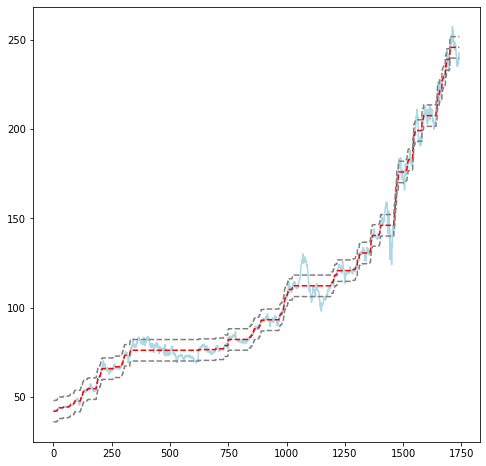

In [104]:
plt.figure(figsize=(8,8))
plt.plot(x,y, c='lightblue')
plt.plot(x,yhat, c='red',linestyle='dashed')
plt.plot(x, upper_bound,c='gray', linestyle='dashed')
plt.plot(x, lower_bound,c='gray', linestyle='dashed');

In [105]:
lower_bound[-1]

239.6118771362203

In [106]:
ze[-1]

-0.8612836299764108

In [107]:
len(ze[ze < ze[-1]])/len(ze)

0.12227324913892078

In [108]:
ip.get_stock_recent_data('petr4','brazil')

,Open,High,Low,Close,Volume,Currency
Date,,,,,,
2021-04-27,23.82,24.17,23.10,23.10,75803200,BRL
2021-04-28,23.40,24.09,23.36,23.94,65861100,BRL
2021-04-29,24.12,24.29,23.42,23.62,49200500,BRL
2021-04-30,23.40,23.93,23.28,23.62,60379700,BRL
2021-05-03,23.80,23.81,23.30,23.43,47970600,BRL
2021-05-04,23.54,23.64,22.88,22.89,43705000,BRL
2021-05-05,23.17,23.95,23.12,23.83,75377296,BRL
2021-05-06,23.71,23.85,23.40,23.50,53646000,BRL
2021-05-07,23.64,24.45,23.46,24.38,73691000,BRL


In [109]:
dir(ip)

['__author__',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '__version__',
 'bonds',
 'certificates',
 'commodities',
 'crypto',
 'currency_crosses',
 'data',
 'economic_calendar',
 'etfs',
 'funds',
 'get_available_currencies',
 'get_bond_countries',
 'get_bond_historical_data',
 'get_bond_information',
 'get_bond_recent_data',
 'get_bonds',
 'get_bonds_dict',
 'get_bonds_list',
 'get_bonds_overview',
 'get_certificate_countries',
 'get_certificate_historical_data',
 'get_certificate_information',
 'get_certificate_recent_data',
 'get_certificates',
 'get_certificates_dict',
 'get_certificates_list',
 'get_certificates_overview',
 'get_commodities',
 'get_commodities_dict',
 'get_commodities_list',
 'get_commodities_overview',
 'get_commodity_groups',
 'get_commodity_historical_data',
 'get_commodity_information',
 'get_commodity_recent_data',
 'get_crypto_historical_data',
 'get_crypto_information',
 '

In [110]:
from scipy.stats import kurtosis, norm

In [138]:
ze.mean()

-2.7328566760003855e-15

In [180]:
def right_kurtosis(x=ze):
    
    from scipy.stats import kurtosis
    
    x = np.array(x)
    a = x[x > 0]
    b = -1 * a
    transformed_x = np.concatenate([a,b])
    output = kurtosis(transformed_x, fisher=False)
    
    return(output)

In [181]:
right_kurtosis(ze)

7.265001311473389

In [182]:
kurtosis(ze)

5.4012131254327365

In [183]:
right_kurtosis(-ze)

8.388360210786573

In [184]:
from scipy.stats import norm, uniform
Z = uniform.rvs(size=int(1e6))
kurtosis(Z, fisher=False)

1.7998467826885074

In [185]:
right_kurtosis(Z)

1.8006253101511787